In [ ]:
## Importing Required Libraries
import numpy as np
import os
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.layers import Dense,Flatten,Dropout,BatchNormalization
from keras.layers import Conv2D,MaxPooling2D,GlobalAveragePooling2D
from keras.applications import MobileNetV2,InceptionResNetV2,VGG16
from keras.preprocessing.image import ImageDataGenerator,array_to_img,img_to_array,load_img

In [ ]:
main_dir = "/content/drive/MyDrive/Projek_UAS/dataset"
os.listdir(main_dir)

['train', 'test']

In [ ]:
test_dir = main_dir + '/test'
os.listdir(test_dir)

['forward_look', 'eye_closed', 'left_', 'right_']

In [ ]:
train_dir = main_dir + '/train'
os.listdir(train_dir)

['forward_look', 'eye_closed', 'left_', 'right_']

In [ ]:
# Creating a data generator
train = ImageDataGenerator(
  rescale=1./255,
    horizontal_flip = True,
    vertical_flip = True,
    validation_split = 0.2
)
train_datagen = train.flow_from_directory(
        train_dir,
        batch_size=32,
        target_size=(128,128),
        class_mode='sparse',
        subset = 'training')

val_datagen = train.flow_from_directory(
        train_dir,
        batch_size=32,
        target_size=(128,128),
        class_mode='sparse',
        subset = 'validation')

# Printing the training set
train_labels = (train_datagen.class_indices)
print(train_labels)

Found 11490 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.
{'eye_closed': 0, 'forward_look': 1, 'left_': 2, 'right_': 3}


In [ ]:
# Create a data generator
test_datagen = ImageDataGenerator(
  rescale=1./255,
    horizontal_flip = True,
    vertical_flip = True
)
test_datagen = test_datagen.flow_from_directory(
        test_dir,
        batch_size=32,
        target_size=(128,128),
        class_mode='sparse')

# Printing the test set
test_labels = (test_datagen.class_indices)
print(test_labels)

Found 14380 images belonging to 4 classes.
{'eye_closed': 0, 'forward_look': 1, 'left_': 2, 'right_': 3}


Found 14360 files belonging to 4 classes.
Using 11488 files for training.


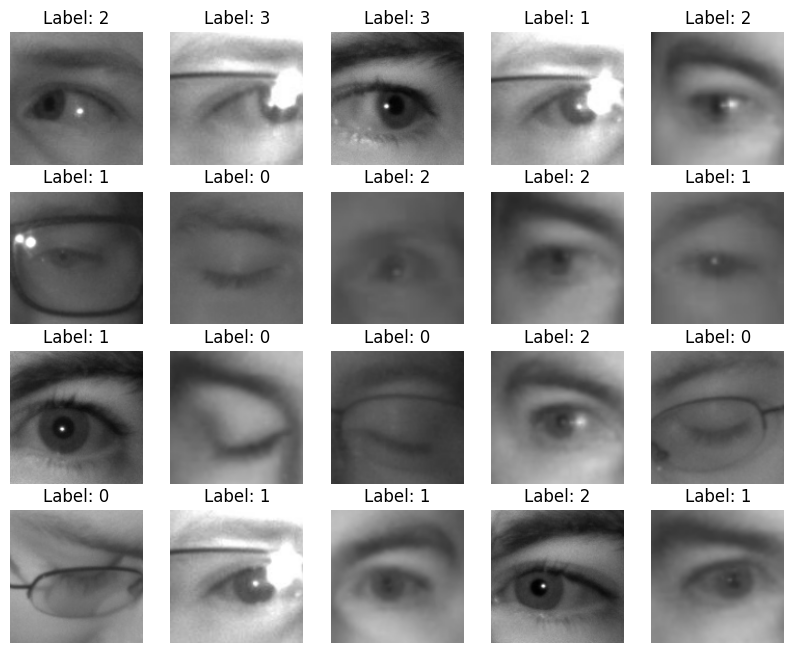

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Ubah direktori sesuai dengan lokasi dataset Anda
train_dir = "/content/drive/MyDrive/Projek_UAS/dataset/train"

# Membuat dataset pelatihan dari direktori
train_set = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,  # Bagian validasi yang akan dipisahkan dari dataset pelatihan (misalnya 0.2 untuk 20%)
    subset="training",  # Menggunakan "training" untuk membuat dataset pelatihan
    seed=101,
    image_size=(128, 128),  # Ubah ukuran gambar sesuai kebutuhan Anda
    batch_size=32,  # Ubah ukuran batch sesuai kebutuhan Anda
)

# Menampilkan beberapa sampel gambar dari dataset pelatihan
plt.figure(figsize=(10, 10))
for images, labels in train_set.take(1):  # Ambil satu batch gambar dari dataset pelatihan
    for i in range(20):  # Menampilkan 9 sampel gambar
        ax = plt.subplot(5, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(f"Label: {labels[i].numpy()}")
        plt.axis("off")
plt.show()

In [ ]:
from IPython.testing import test
#mengumpulkan path untuk direktori dasar
base_dir='/content/drive/MyDrive/Projek_UAS/dataset'
train_dir=os.path.join(base_dir, 'train') # menggabungkan direktori training dengan menggunakan os.path.join()
test_dir=os.path.join(base_dir, 'test')  #menggabungkan direktori validation dengan menggunakan os.path.join()

train_a_dir=os.path.join(train_dir,'eye_closed') # untuk menggabungkan training_dir
train_b_dir=os.path.join(train_dir,'forward_look') #untuk menggabungkan training_dir
train_m_dir=os.path.join(train_dir,'left_') #untuk menggabungkan training_dir
train_o_dir=os.path.join(train_dir,'right_') #untuk menggabungkan training_dir


test_a_dir=os.path.join(test_dir,'eye_closed') # untuk menggabungkan test_dir
test_b_dir=os.path.join(test_dir,'forward_look')# untuk menggabungkan test_dir
test_m_dir=os.path.join(test_dir,'left_')# untuk menggabungkan test_dir
test_o_dir=os.path.join(test_dir,'right_')# untuk menggabungkan test_dir



#Let's find out the total number of horse and human images in the directories:
print('total eye_closed in train: ', len(os.listdir(train_a_dir))) #
print('total forward_look in train: ', len(os.listdir(train_b_dir)))
print('total left_ in train: ', len(os.listdir(train_m_dir)))
print('total right_ in train: ', len(os.listdir(train_o_dir)))

print('total eye_closed in test: ', len(os.listdir(test_a_dir))) #
print('total forward_look in test: ', len(os.listdir(test_b_dir)))
print('total left_ in test: ', len(os.listdir(test_m_dir)))
print('total right_ in test: ', len(os.listdir(test_o_dir)))

total eye_closed in train:  3828
total forward_look in train:  3457
total left_ in train:  3498
total right_ in train:  3577
total eye_closed in test:  3828
total forward_look in test:  3457
total left_ in test:  3508
total right_ in test:  3587


In [ ]:
#melihat file di direktori
train_a_names = os.listdir(train_a_dir)
print(train_a_names[:10])# mencetak 10 nama pertama dari daftar nama file yang ada dalam direktori train_a_dir
train_b_names = os.listdir(train_b_dir)
print(train_b_names[:10])
train_m_names = os.listdir(train_m_dir)
print(train_m_names[:10])
train_o_names = os.listdir(train_o_dir)
print(train_o_names[:10])


test_a_names = os.listdir(test_a_dir)
print(test_a_names[:10]) #mencetak 10 nama pertama dari daftar nama file yang ada dalam direktori valid_a_dir
test_b_names = os.listdir(test_b_dir)
print(test_b_names[:10])
test_m_names = os.listdir(test_m_dir)
print(test_m_names[:10])
test_o_names = os.listdir(test_o_dir)
print(test_o_names[:10])

['eye_closed(3520).png', 'eye_closed(3546).png', 'eye_closed(3532).png', 'eye_closed(3549).png', 'eye_closed(3545).png', 'eye_closed(3539).png', 'eye_closed(3526).png', 'eye_closed(3548).png', 'eye_closed(353).png', 'eye_closed(352).png']
['forward_look (3184).png', 'forward_look (3165).png', 'forward_look (3185).png', 'forward_look (3169).png', 'forward_look (3163).png', 'forward_look (3172).png', 'forward_look (3177).png', 'forward_look (318).png', 'forward_look (3160).png', 'forward_look (3166).png']
['left_(544).jpg', 'left_(544).png', 'left_(54).jpg', 'left_(556).png', 'left_(555).png', 'left_(548).jpg', 'left_(554).png', 'left_(546).png', 'left_(545).png', 'left_(550).jpg']
['right_(551).jpg', 'right_(542).png', 'right_(548).png', 'right_(550).jpg', 'right_(552).png', 'right_(550).png', 'right_(543).jpg', 'right_(549).jpg', 'right_(54).jpg', 'right_(540).jpg']
['eye_closed(3548).png', 'eye_closed(3540).png', 'eye_closed(3535).png', 'eye_closed(354).png', 'eye_closed(3521).png', '

In [ ]:
for image_batch, label_batch in train_datagen:
    break
image_batch.shape, label_batch.shape

# This would be same for test set

((32, 128, 128, 3), (32,))

In [ ]:
from tensorflow.keras.models import Sequential
model=Sequential()

#Convolution blocks
model.add(Conv2D(32, kernel_size = (3,3),
                 padding='same',
                 input_shape=(128,128,3),
                 activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(64, kernel_size = (3,3),
                 padding='same',
                 activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(32, kernel_size = (3,3),
                 padding='same',
                 activation='relu'))
model.add(MaxPooling2D(pool_size=2))

#Classification layers
model.add(Flatten())

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32,activation='relu'))

model.add(Dropout(0.2))
model.add(Dense(6,activation='softmax'))


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 32, 32, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 16, 32)        0

In [ ]:
model.compile(optimizer = 'Adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
trained_model =  model.fit(
      train_datagen,
      steps_per_epoch=20,
      epochs=100,
      validation_data=val_datagen,
      validation_steps=30,
     verbose=1

)

Epoch 1/100
20/20 [==============================] - 341s 17s/step - loss: 1.6785 - accuracy: 0.2547 - val_loss: 1.5608 - val_accuracy: 0.2344
Epoch 2/100
20/20 [==============================] - 254s 13s/step - loss: 1.5663 - accuracy: 0.2641 - val_loss: 1.4917 - val_accuracy: 0.2781
Epoch 3/100
20/20 [==============================] - 249s 13s/step - loss: 1.5038 - accuracy: 0.3047 - val_loss: 1.4322 - val_accuracy: 0.2781
Epoch 4/100
20/20 [==============================] - 246s 13s/step - loss: 1.4407 - accuracy: 0.3578 - val_loss: 1.3661 - val_accuracy: 0.3458
Epoch 5/100
20/20 [==============================] - 139s 7s/step - loss: 1.3690 - accuracy: 0.3844 - val_loss: 1.2762 - val_accuracy: 0.3396
Epoch 6/100
20/20 [==============================] - 168s 8s/step - loss: 1.2561 - accuracy: 0.4094 - val_loss: 1.3014 - val_accuracy: 0.3167
Epoch 7/100
20/20 [==============================] - 116s 5s/step - loss: 1.1709 - accuracy: 0.4531 - val_loss: 1.2490 - val_accuracy: 0.3083
Ep

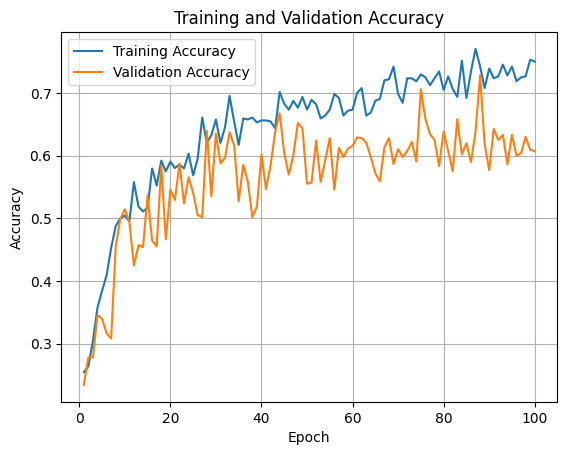

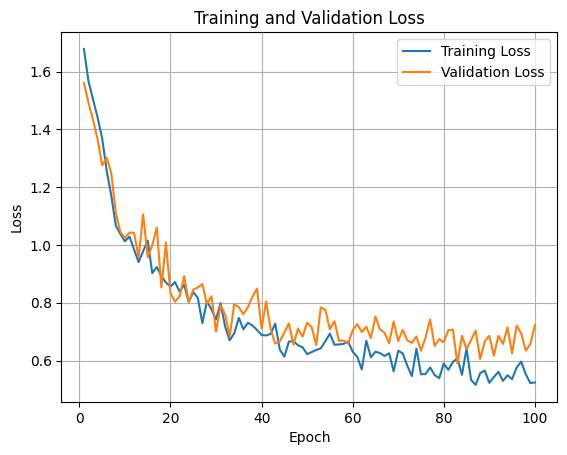

In [ ]:
import matplotlib.pyplot as plt

# Mendapatkan data akurasi dan loss dari hasil pelatihan
train_accuracy = trained_model.history['accuracy']
train_loss = trained_model.history['loss']
val_accuracy = trained_model.history['val_accuracy']
val_loss = trained_model.history['val_loss']

# Menghasilkan plot untuk akurasi
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Training Accuracy')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Menghasilkan plot untuk loss
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
model_dir = '/content/drive/MyDrive/Projek_UAS/model/model.h5'
model.save(model_dir)

In [ ]:
from tensorflow import keras
model = keras.models.load_model(model_dir)

Saving forward_look (2).jpg to forward_look (2).jpg
1/1 [==============================] - 0s 159ms/step
Accuracy: 99.95%
Output: forward_look


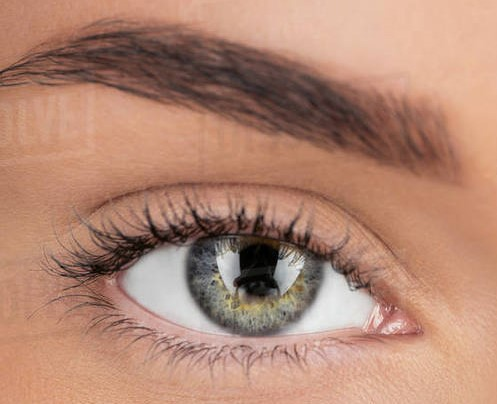

In [ ]:
import matplotlib
matplotlib.use('Agg')  # Menetapkan 'Agg' sebagai backend untuk menghindari pesan kesalahan

from keras.preprocessing import image
from google.colab import files
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Image


# Fungsi untuk memuat dan mengklasifikasikan gambar yang dipilih
def classify_image():
    uploaded = files.upload()
    labels = {0: 'eye_closed', 1: 'forward_look', 2: 'left_', 3: 'right'}
    if not uploaded:
        return

    file_path = next(iter(uploaded))
    img = image.load_img(file_path, target_size=(128, 128))
    img_array = image.img_to_array(img)
    img_array = np.array(img_array) / 255.0

    # Assuming you have already initialized your model before this step
    # Replace 'model' with your actual Keras model
    predictions = model.predict(img_array[np.newaxis, ...])

    # Displaying the output
    acc = np.max(predictions[0]) * 100
    print(f'Accuracy: {acc:.2f}%')
    result = labels[np.argmax(predictions[0], axis=-1)]
    print(f'Output: {result}')

    # Display the image
    plt.axis('off')
    plt.imshow(img)
    plt.savefig("output_image.png")  # Simpan gambar sebagai file
    plt.show()

    # Menampilkan gambar yang dipilih di dalam notebook
    display(Image(file_path))

# Membuat GUI dengan tombol "Choose Image"
classify_image()
